In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


plt.style.use('default')
sns.set(style="whitegrid")

pd.options.display.float_format= '{:20,.2f}'.format

import warnings
warnings.filterwarnings ('ignore')

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials



In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [4]:
#train Values
id='1MfI3tbZRkbrJRwqnxlETdWnlNIzDhSRf'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')


In [5]:
#LECTURA DE ARCHIVO*
#*******************
trainValues=pd.read_csv('train_values.csv')

In [6]:
trainValues.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#Detalle de trainValues
trainValues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [8]:

trainValues.size

10163439

In [9]:
trainValues.shape

(260601, 39)

In [10]:

trainValues.count()

building_id                               260601
geo_level_1_id                            260601
geo_level_2_id                            260601
geo_level_3_id                            260601
count_floors_pre_eq                       260601
age                                       260601
area_percentage                           260601
height_percentage                         260601
land_surface_condition                    260601
foundation_type                           260601
roof_type                                 260601
ground_floor_type                         260601
other_floor_type                          260601
position                                  260601
plan_configuration                        260601
has_superstructure_adobe_mud              260601
has_superstructure_mud_mortar_stone       260601
has_superstructure_stone_flag             260601
has_superstructure_cement_mortar_stone    260601
has_superstructure_mud_mortar_brick       260601
has_superstructure_c

In [11]:
trainValues['other_floor_type'].count()

260601

In [12]:
#train_labels 
id='11AAFbmPsdANx4HtkEhYMLf-n26UcIE7z'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_labels.csv')

In [13]:
#Leo Archivo
trainLabels=pd.read_csv('train_labels.csv')

In [14]:
trainLabels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [15]:
trainLabels.shape

(260601, 2)

In [16]:
trainLabels.count()

building_id     260601
damage_grade    260601
dtype: int64

In [17]:
trainLabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [18]:
trainValues_building= trainValues[['building_id','age','count_floors_pre_eq']]



In [19]:
# Verifico que exista 1 solo buildind_id por Edificio, es decir q no este repetido por error
trainValues['building_id'].value_counts()

1052670    1
847304     1
368102     1
729986     1
900578     1
          ..
56753      1
946311     1
15789      1
13740      1
524288     1
Name: building_id, Length: 260601, dtype: int64

In [20]:
#cantidad de edificios por cantidad de edades de los mismos
trainValues['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [21]:
#cantidad de edificios por cantidad de pisos
trainValues['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

In [23]:
# Genero un DataFrame con el ID del edificio , edad  y cantidad de pisos
trainValues_building

,building_id,age,count_floors_pre_eq
0,802906,30,2
1,28830,10,2
2,94947,10,2
3,590882,10,2
4,201944,30,3
...,...,...,...
260596,688636,55,1
260597,669485,0,2
260598,602512,55,3
260599,151409,10,2


In [24]:
building= trainValues_building.merge(trainLabels, left_on='building_id', right_on='building_id',how='outer')

In [25]:
building.head(10)

,building_id,age,count_floors_pre_eq,damage_grade
0,802906,30,2,3
1,28830,10,2,2
2,94947,10,2,3
3,590882,10,2,2
4,201944,30,3,3
5,333020,10,2,2
6,728451,25,2,3
7,475515,0,2,1
8,441126,15,2,2
9,989500,0,1,1


In [26]:
#Elimino building_id
building.drop(columns='building_id',inplace=True)


In [27]:
#Agrego Nueva columna 
building['cantidadxGrade'] = 1

In [28]:
building.head(10)

,age,count_floors_pre_eq,damage_grade,cantidadxGrade
0,30,2,3,1
1,10,2,2,1
2,10,2,3,1
3,10,2,2,1
4,30,3,3,1
5,10,2,2,1
6,25,2,3,1
7,0,2,1,1
8,15,2,2,1
9,0,1,1,1


In [29]:
build_total = building.groupby(['age','count_floors_pre_eq','damage_grade']).count().reset_index()

In [33]:
#Cantidad de edificios afectados segun "tipo de Daño" de acuerdo a la edad del edificio y nros de piso de la edificacion
build_total.head(10)

,age,count_floors_pre_eq,damage_grade,cantidadxGrade
0,0,1,1,3887
1,0,1,2,3376
2,0,1,3,1314
3,0,2,1,2589
4,0,2,2,7400
5,0,2,3,3467
6,0,3,1,536
7,0,3,2,1820
8,0,3,3,1310
9,0,4,1,138


Text(0.5, 1.0, 'Damage Grade vs Cant_Grade')

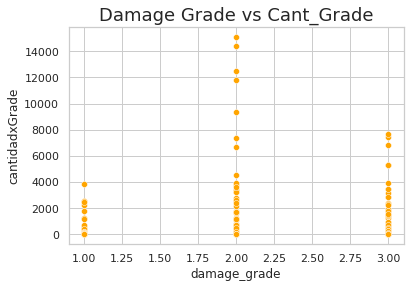

In [34]:
g=sns.scatterplot(x='damage_grade',y='cantidadxGrade', data=build_total,color='orange')
g.set_title('Damage Grade vs Cant_Grade',fontsize=18)

# ***MATERIALES DE EDIFICACION***

In [62]:
materiasles= trainValues[['building_id','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_superstructure_other']]

In [63]:
materiasles.head(10)

,building_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,802906,1,1,0,0,0,0,0,0,0,0,0
1,28830,0,1,0,0,0,0,0,0,0,0,0
2,94947,0,1,0,0,0,0,0,0,0,0,0
3,590882,0,1,0,0,0,0,1,1,0,0,0
4,201944,1,0,0,0,0,0,0,0,0,0,0
5,333020,0,1,0,0,0,0,0,0,0,0,0
6,728451,0,1,0,0,0,0,0,0,0,0,0
7,475515,0,0,0,0,0,1,1,0,0,0,0
8,441126,0,1,0,0,0,0,1,0,0,0,0
9,989500,0,0,0,0,0,1,0,0,0,0,0


In [64]:
#merge entre ambos data Frame
materiales_Edificacion= materiasles.merge(trainLabels, left_on='building_id', right_on='building_id',how='outer')

In [65]:
materiales_Edificacion.head(10)

,building_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,802906,1,1,0,0,0,0,0,0,0,0,0,3
1,28830,0,1,0,0,0,0,0,0,0,0,0,2
2,94947,0,1,0,0,0,0,0,0,0,0,0,3
3,590882,0,1,0,0,0,0,1,1,0,0,0,2
4,201944,1,0,0,0,0,0,0,0,0,0,0,3
5,333020,0,1,0,0,0,0,0,0,0,0,0,2
6,728451,0,1,0,0,0,0,0,0,0,0,0,3
7,475515,0,0,0,0,0,1,1,0,0,0,0,1
8,441126,0,1,0,0,0,0,1,0,0,0,0,2
9,989500,0,0,0,0,0,1,0,0,0,0,0,1


In [66]:
materiales_Edificacion.dtypes

building_id                               int64
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick    int64
has_superstructure_timber                 int64
has_superstructure_bamboo                 int64
has_superstructure_rc_non_engineered      int64
has_superstructure_rc_engineered          int64
has_superstructure_other                  int64
damage_grade                              int64
dtype: object

In [67]:
#Elimino building_id
materiales_Edificacion.drop(columns='building_id',inplace=True)

In [69]:
materiales_Edificacion.head(10)

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1,1,0,0,0,0,0,0,0,0,0,3
1,0,1,0,0,0,0,0,0,0,0,0,2
2,0,1,0,0,0,0,0,0,0,0,0,3
3,0,1,0,0,0,0,1,1,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,0,3
5,0,1,0,0,0,0,0,0,0,0,0,2
6,0,1,0,0,0,0,0,0,0,0,0,3
7,0,0,0,0,0,1,1,0,0,0,0,1
8,0,1,0,0,0,0,1,0,0,0,0,2
9,0,0,0,0,0,1,0,0,0,0,0,1


In [70]:
#Cantidad de Edificaciones con diferentes estructuras,  puede haber una misma estructura con mas de 1 tipo de material de estructura

materiales_Edificacion.groupby('damage_grade').agg('sum')

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,,
1,594,8760,182,829,623,7105,7642,2839,3857,2656,656
2,13902,113947,4534,3248,11698,11421,40187,14001,5832,1402,2248
3,8605,75854,4231,675,5440,1089,18621,5314,1410,75,1001


In [72]:
materiales_Edificacion.reset_index()

,index,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,0,1,1,0,0,0,0,0,0,0,0,0,3
1,1,0,1,0,0,0,0,0,0,0,0,0,2
2,2,0,1,0,0,0,0,0,0,0,0,0,3
3,3,0,1,0,0,0,0,1,1,0,0,0,2
4,4,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,260596,0,1,0,0,0,0,0,0,0,0,0,2
260597,260597,0,1,0,0,0,0,0,0,0,0,0,3
260598,260598,0,1,0,0,0,0,0,0,0,0,0,3
260599,260599,0,0,0,0,0,1,0,0,0,0,0,2


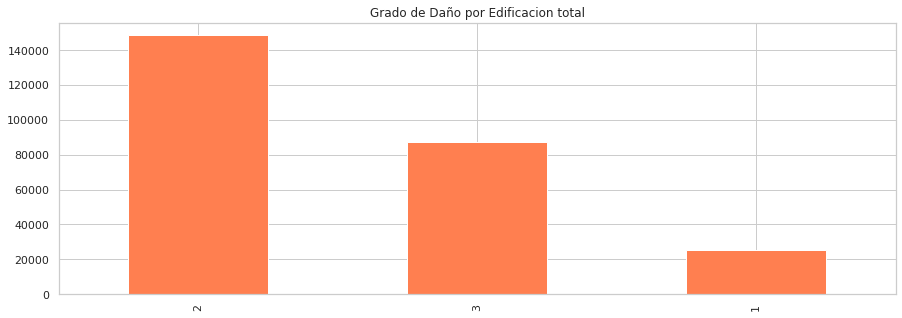

In [75]:
materiales_Edificacion['damage_grade'].value_counts().plot(kind='bar',figsize=(15,5),title='Grado de Daño por Edificacion total',color='coral')